In this notebook, we will try and understand the notion of positive definitiveness and positive semi-definitiveness. We will be referring an excellent video from 3Blue1Brown: https://www.youtube.com/watch?v=kYB8IZa5AuE

The main concepts in this notebook are:

- Matrix vector product as linear transformation
- Vector dot product


In [2]:
import numpy as np
import matplotlib.pyplot as plt

$\vec{x} = 1\hat{i} + 2\hat{j}$

(-1.0, 3.0)

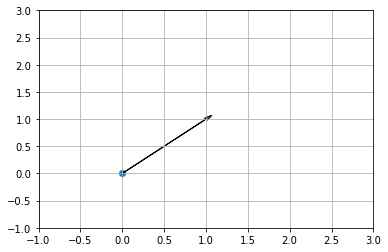

In [158]:
plt.arrow(0, 0, 1, 1,shape='full', head_width=0.05, head_length=0.1)
plt.scatter(0, 0)
plt.grid()
plt.ylim((-1, 3))
plt.xlim(-1, 3)

We have now shown the plotted arrow correpsonding to the vector (1, 2)

In [157]:
M = np.array([[1, 0], [0, 2]])

# x_inp is 
x_inp = np.array([1, 2])

$\hat{i}$ ends at $[1; 0]^T$

$\hat{j}$ ends at $[0; 2]^T$

Therefore $1\hat{i} + 2\hat{j}$ lands at $1[1; 0]^T + 2[0; 2]^T$ or $1\hat{i} + 4\hat{j}$

In [193]:
def plot_transformation(x, M):
    arrow_in = plt.arrow(0, 0, x[0], x[1],shape='full', head_width=0.05, head_length=0.1,color='green',alpha=0.5,lw=5)
    plt.scatter(0, 0)
    plt.grid()
    Mx = M@x


    plt.ylim((min(Mx[1], x[1], 0)-1, max(Mx[1], x[1], 0)+1))
    plt.xlim((min(Mx[0], x[0], 0)-1, max(Mx[0], x[0], 0)+1))


    arrow_out = plt.arrow(0, 0, Mx[0], Mx[1],shape='full', head_width=0.05, head_length=0.1, color='red')
    plt.legend([arrow_in, arrow_out, ], ['Input','Transformed',], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.gca().set_aspect('equal')
    return Mx

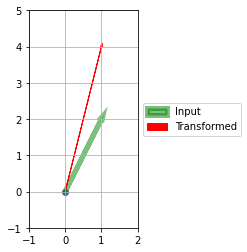

In [194]:
Mx = plot_transformation(x, M)

The above plot shows (1, 2) being transformed to (1, 4). It is interesting to note that (1, 2) and (1, 4) both point in **similar** direction ($-\pi/2 \lt \theta \lt \pi/2$)

Let us now look at a different input and a different transformation.

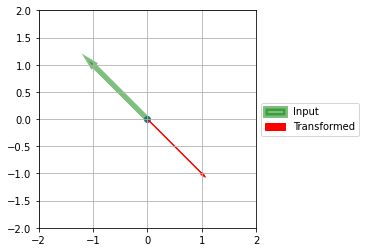

In [195]:
Mx = plot_transformation(np.array([-1, 1]), np.array([[1, 2], [2, 1]]))

For the above transformation, it seems that the angle is 180 degrees

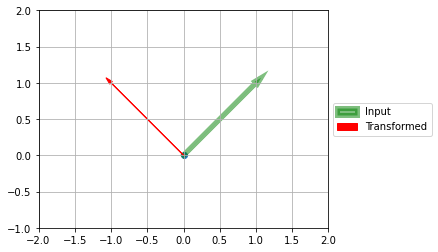

In [196]:
Mx = plot_transformation(np.array([1, 1]), np.array([[0, -1], [1, 0]]))

In [197]:
def plot_dot(x, v):
    arrow_in = plt.arrow(0, 0, x[0], x[1],shape='full', head_width=0.05, head_length=0.1,color='green',lw=2,alpha=2)
    plt.scatter(0, 0)
    plt.grid(True)
    xv = x@v
    arrow_out = plt.arrow(0, 0, xv, 0,shape='full', head_width=0.05, head_length=0.1, color='violet',lw=3)
    plt.ylim((min(x[1], 0)-1, max(x[1], 0)+1))
    plt.xlim((min( xv, x[0], 0)-1, max(xv, x[0], 0)+1))
    plt.legend([arrow_in, arrow_out, ], ['Input','Transformed (M)', 'xTMx'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.gca().set_aspect('equal')


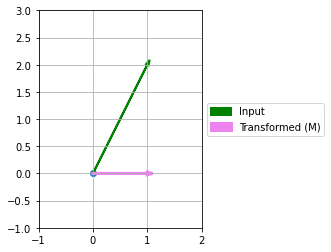

In [198]:

plot_dot(x, Mx)


In [199]:
def plot_full(x, M):
    v = Mx = M@x
    
    arrow_in = plt.arrow(0, 0, x[0], x[1],shape='full', head_width=0.05, head_length=0.1,color='green',lw=10, alpha=0.5)
    plt.scatter(0, 0)
    plt.grid(True)
    xv = x@v
    arrow_mx = plt.arrow(0, 0, Mx[0], Mx[1],shape='full', head_width=0.05, head_length=0.1, color='red')
    arrow_out = plt.arrow(0, 0, xv, 0,shape='full', head_width=0.05, head_length=0.1, color='violet',lw=3)
    plt.ylim((min(Mx[1], x[1], 0)-1, max(Mx[1], x[1], 0)+1))
    plt.xlim((min(Mx[0], xv, x[0], 0)-1, max(Mx[0], xv, x[0], 0)+1))
    plt.legend([arrow_in, arrow_mx, arrow_out, ], ['Input','Transformed (M)', r'$x^TMx$'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.gca().set_aspect('equal')



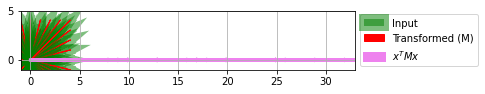

In [200]:
for i in range(-5, 5, 1):
    for j in range(-5, 5, 1):
        plot_full([i, j], np.array([[1, 0], [0, 1]]))

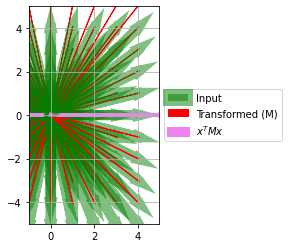

In [201]:
for i in range(-5, 5, 1):
    for j in range(-5, 5, 1):
        plot_full([i, j], np.array([[1, 0], [0, -1]]))

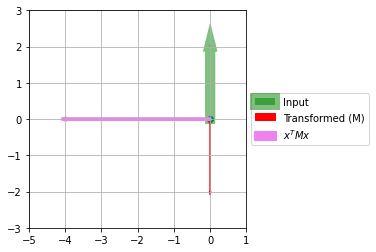

In [202]:
plot_full([0, 2], np.array([[1, 0], [0, -1]]))

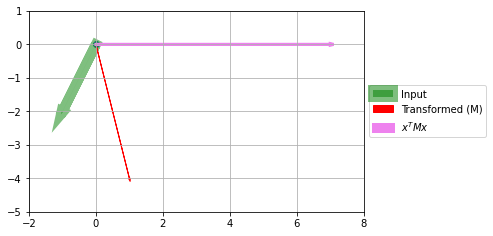

In [203]:
plot_full([-1, -2], np.array([[1, -1], [0, 2]]))

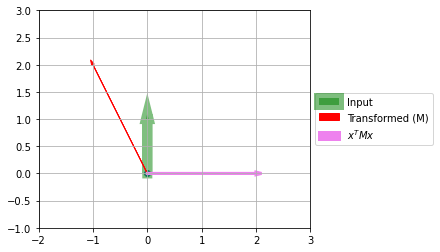

In [204]:
plot_full([0, 1], np.array([[1, -1], [0, 2]]))

In [205]:
from numpy import linalg as LA


In [206]:
LA.eig(M)

(array([1., 2.]),
 array([[1., 0.],
        [0., 1.]]))

In [207]:
M

array([[1, 0],
       [0, 2]])

In [208]:
vals, vectors = LA.eig(np.array([[1, 1], [2, 4]]))
vals, vectors

(array([0.43844719, 4.56155281]),
 array([[-0.87192821, -0.27032301],
        [ 0.48963374, -0.96276969]]))

array([-0.38229447,  0.21467854])

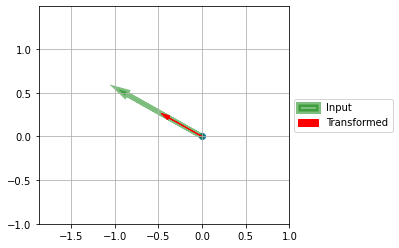

In [209]:
plot_transformation(vectors[:, 0], np.array([[1, 1], [2, 4]]))

array([-1.2330927 , -4.39172477])

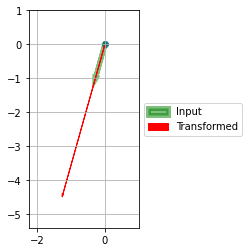

In [210]:
plot_transformation(vectors[:, 1], np.array([[1, 1], [2, 4]]))

Why non negative eigen values: https://math.stackexchange.com/questions/1404534/why-does-positive-definite-matrix-have-strictly-positive-eigenvalue